##Reading all the blobs streaming in on the Container

In [0]:
import os
import string
import json
import uuid
import avro.schema
import pandas as pd

from azure.storage.blob import ContainerClient, BlobClient
from avro.datafile import DataFileReader, DataFileWriter
from avro.io import DatumReader, DatumWriter

first_flag=1
all_inputs=pd.DataFrame()
colnames=['id','timestamp','uv','temp','humidity'] 

def processBlob2(filename):
    global all_inputs,first_flag,colnames
    reader = DataFileReader(open(filename, 'rb'), DatumReader())
    dict = {}
    for reading in reader:
        parsed_json = json.loads(reading["Body"])
        if not 'id' in parsed_json:
            return
        if not parsed_json['id'] in dict:
            list = []
            dict[parsed_json['id']] = list
        else:
            list = dict[parsed_json['id']]
            list.append(parsed_json)
    reader.close()
    for device in dict.keys():
        filename = os.getcwd() + '\\' + str(device) + '.csv'
        deviceFile = open(filename, "a")
        for r in dict[device]:
            deviceFile.write(", ".join([str(r[x]) for x in r.keys()])+'\n')
    if first_flag==1:
        all_inputs=pd.read_csv(filename,names=colnames,header=None)
        first_flag=2
    else:
        all_inputs.append(pd.read_csv(filename,names=colnames,header=None))
    #print(all_inputs)

def startProcessing_into_Dataframe():
    print('Processor started using path: ' + os.getcwd())
    # Create a blob container client.
    df=pd.DataFrame()
    container = ContainerClient.from_connection_string("DefaultEndpointsProtocol=https;AccountName=eventsrecord;AccountKey=RQDhZac3C6ROykbVDVKthDKuRt4ilz4S4ETsM1Alm6x9TauHGLo+AlfmdqYlox4lkYAqkTUlr6E++AStMurJxg==;EndpointSuffix=core.windows.net", container_name="eventblob")
    blob_list = container.list_blobs() # List all the blobs in the container.
    for blob in blob_list:
        # Content_length == 508 is an empty file, so process only content_length > 508 (skip empty files).        
        if blob.size > 508:
            print('Downloaded a non empty blob: ' + blob.name)
            # Create a blob client for the blob.
            blob_client = ContainerClient.get_blob_client(container, blob=blob.name)
            # Construct a file name based on the blob name.
            cleanName = str.replace(blob.name, '/', '_')
            cleanName = os.getcwd() + '\\' + cleanName 
            with open(cleanName, "wb+") as my_file: # Open the file to write. Create it if it doesn't exist. 
                my_file.write(blob_client.download_blob().readall()) # Write blob contents into the file.
            processBlob2(cleanName) # Convert the file into a CSV file.           
            os.remove(cleanName) # Remove the original downloaded file.
            # Delete the blob from the container after it's read.
            #container.delete_blob(blob.name)

startProcessing_into_Dataframe()

Processor started using path: /databricks/driver
Downloaded a non empty blob: bigdataproject721/myeventhub/0/2022/03/25/00/40/26.avro

In [0]:
all_inputs

Out[32]:

,id,timestamp,uv,temp,humidity
0,cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.360158,0.481653,82,81
1,cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.370182,0.991610,70,83
2,cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.381423,0.035173,78,86
3,cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.391656,0.603103,79,94
4,cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.402098,0.444743,70,83
...,...,...,...,...,...
223,cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.518831,0.398362,94,88
224,cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.558127,0.481662,77,80
225,cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.567611,0.116253,77,77
226,cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.577704,0.431795,94,83


## Visualizations

In [0]:
display(all_inputs)

id,timestamp,uv,temp,humidity
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.360158,0.4816533547739949,82,81
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.370182,0.9916098449684674,70,83
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.381423,0.0351728705925977,78,86
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.391656,0.6031034469759939,79,94
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.402098,0.4447429457638298,70,83
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.416675,0.3947507199120902,84,93
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.426869,0.6874738855017821,90,90
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.436547,0.4153582728946321,96,82
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.450739,0.4996924952720559,90,97
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.460501,0.1180474033115753,78,74


In [0]:
display(all_inputs)

id,timestamp,uv,temp,humidity
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.360158,0.4816533547739949,82,81
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.370182,0.9916098449684674,70,83
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.381423,0.0351728705925977,78,86
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.391656,0.6031034469759939,79,94
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.402098,0.4447429457638298,70,83
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.416675,0.3947507199120902,84,93
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.426869,0.6874738855017821,90,90
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.436547,0.4153582728946321,96,82
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.450739,0.4996924952720559,90,97
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.460501,0.1180474033115753,78,74


In [0]:
display(all_inputs)

id,timestamp,uv,temp,humidity
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.360158,0.4816533547739949,82,81
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.370182,0.9916098449684674,70,83
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.381423,0.0351728705925977,78,86
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.391656,0.6031034469759939,79,94
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.402098,0.4447429457638298,70,83
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.416675,0.3947507199120902,84,93
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.426869,0.6874738855017821,90,90
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.436547,0.4153582728946321,96,82
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.450739,0.4996924952720559,90,97
cbeec1a9-03d8-4dde-b331-4ef3c202389e,2022-03-25 00:44:27.460501,0.1180474033115753,78,74


###Analyzing and saving the images

In [0]:
spark.conf.set("fs.azure.account.key.eventsrecord.blob.core.windows.net", "RQDhZac3C6ROykbVDVKthDKuRt4ilz4S4ETsM1Alm6x9TauHGLo+AlfmdqYlox4lkYAqkTUlr6E++AStMurJxg==")

Out[71]:

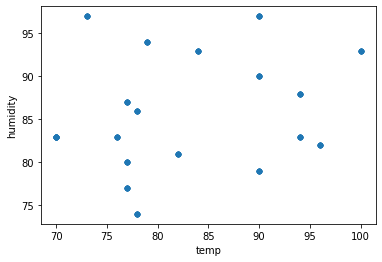

True

In [0]:
import matplotlib.pyplot as plt

all_inputs.plot.scatter(x='temp',y='humidity')
plt.savefig('/dbfs/Graph1.png')
dbutils.fs.cp('dbfs:/Graph1.png', 'wasbs://eventblob@eventsrecord.blob.core.windows.net/bigdataproject721/Analysis_graphs/Graph1.png')

##Creating a Simple linear regression model

In [0]:
from sklearn.model_selection import train_test_split
import numpy as np
data=all_inputs
X = data.drop(["id","timestamp","humidity"], axis=1)
y = data.humidity>np.mean(data.humidity)
 
# Split out the training data
X_train, X_rem, y_train, y_rem = train_test_split(X, y, train_size=0.6, random_state=123)
 
# Split the remaining data equally into validation and test
X_val, X_test, y_val, y_test = train_test_split(X_rem, y_rem, test_size=0.5, random_state=123)

In [0]:
import mlflow
import mlflow.pyfunc
import mlflow.sklearn
import numpy as np
import sklearn
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score
from mlflow.models.signature import infer_signature
from mlflow.utils.environment import _mlflow_conda_env
import cloudpickle
import time
 
# The predict method of sklearn's RandomForestClassifier returns a binary classification (0 or 1). 
# The following code creates a wrapper function, SklearnModelWrapper, that uses 
# the predict_proba method to return the probability that the observation belongs to each class. 
 
class SklearnModelWrapper(mlflow.pyfunc.PythonModel):
      def __init__(self, model):
        self.model = model
    
      def predict(self, context, model_input):
        return self.model.predict_proba(model_input)[:,1]
 # mlflow.start_run creates a new MLflow run to track the performance of this model. 
# Within the context, you call mlflow.log_param to keep track of the parameters used, and
# mlflow.log_metric to record metrics like accuracy.
with mlflow.start_run(run_name='untuned_random_forest'):
      n_estimators = 10
      model = RandomForestClassifier(n_estimators=n_estimators, random_state=np.random.RandomState(123))
      model.fit(X_train, y_train)
 
      # predict_proba returns [prob_negative, prob_positive], so slice the output with [:, 1]
      predictions_test = model.predict_proba(X_test)[:,1]
      auc_score = roc_auc_score(y_test, predictions_test)
      mlflow.log_param('n_estimators', n_estimators)
      # Use the area under the ROC curve as a metric.
      mlflow.log_metric('auc', auc_score)
      wrappedModel = SklearnModelWrapper(model)
      # Log the model with a signature that defines the schema of the model's inputs and outputs. 
      # When the model is deployed, this signature will be used to validate inputs.
      signature = infer_signature(X_train, wrappedModel.predict(None, X_train))

      # MLflow contains utilities to create a conda environment used to serve models.
      # The necessary dependencies are added to a conda.yaml file which is logged along with the model.
      conda_env =  _mlflow_conda_env(
            additional_conda_deps=None,
            additional_pip_deps=["cloudpickle=={}".format(cloudpickle.__version__), "scikit-learn=={}".format(sklearn.__version__)],
            additional_conda_channels=None,
        )
      mlflow.pyfunc.log_model("random_forest_model", python_model=wrappedModel, conda_env=conda_env, signature=signature)

/databricks/python/lib/python3.8/site-packages/mlflow/models/signature.py:129: UserWarning: Hint: Inferred schema contains integer column(s). Integer columns in Python cannot represent missing values. If your input data contains missing values at inference time, it will be encoded as floats and will cause a schema enforcement error. The best way to avoid this problem is to infer the model schema based on a realistic data sample (training dataset) that includes missing values. Alternatively, you can declare integer columns as doubles (float64) whenever these columns may have missing values. See `Handling Integers With Missing Values <https://www.mlflow.org/docs/latest/models.html#handling-integers-with-missing-values>`_ for more details.
 inputs = _infer_schema(model_input)

In [0]:
feature_importances = pd.DataFrame(model.feature_importances_, index=X_train.columns.tolist(), columns=['importance'])
feature_importances.sort_values('importance', ascending=False)

Out[60]:

,importance
uv,0.666106
temp,0.333894


In [0]:
run_id = mlflow.search_runs(filter_string='tags.mlflow.runName = "untuned_random_forest"').iloc[0].run_id

##Register Model

In [0]:
# If you see the error "PERMISSION_DENIED: User does not have any permission level assigned to the registered model", 
# the cause may be that a model already exists with the name "wine_quality". Try using a different name.
model_name = "humidity_high"
model_version = mlflow.register_model(f"runs:/{run_id}/random_forest_model", model_name)
 
# Registering the model takes a few seconds, so add a small delay
time.sleep(15)

Successfully registered model 'humidity_high'.
2022/03/25 02:08:04 INFO mlflow.tracking._model_registry.client: Waiting up to 300 seconds for model version to finish creation. Model name: humidity_high, version 1
Created version '1' of model 'humidity_high'.

##Save Model

In [0]:
  modelpath = "/dbfs/my_project_models/model_humidity"
  mlflow.sklearn.save_model(0.01, modelpath)